# Stability Analysis of Algorithmic Stablecoins

This notebook provides a comprehensive analysis of algorithmic stablecoin dynamics under stress conditions.

## Objectives

1. Run collateral shock experiments
2. Run liquidity crisis experiments
3. Compare system behavior under different shock types
4. Quantify stability metrics
5. Identify structural collapse conditions

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')

from model import SystemParameters, simulate_step
from experiments import (
    run_collateral_shock_experiment,
    run_liquidity_crisis_experiment,
    plot_results,
    ExperimentResults
)

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

## 1. Baseline Parameters

We define the baseline system parameters for our simulations.

In [12]:
# Initialize baseline parameters
params = SystemParameters(
    mint_coefficient=0.1,
    burn_coefficient=0.1,
    liquidity_depth=1e6,
    demand_elasticity=0.5,
    initial_supply=1e6,
    initial_collateral=1.5e6,
    initial_price=1.0,
    initial_liquidity=1e6,
    initial_demand=1e6,
    dt=0.1,
    random_seed=42,
    collapse_price_threshold=0.5,
    recovery_price_threshold=0.95
)

print("System Parameters:")
print(f"  Mint coefficient: {params.mint_coefficient}")
print(f"  Burn coefficient: {params.burn_coefficient}")
print(f"  Liquidity depth: {params.liquidity_depth:,.0f}")
print(f"  Demand elasticity: {params.demand_elasticity}")
print(f"  Collapse threshold: {params.collapse_price_threshold}")

System Parameters:
  Mint coefficient: 0.1
  Burn coefficient: 0.1
  Liquidity depth: 1,000,000
  Demand elasticity: 0.5
  Collapse threshold: 0.5


## 2. Collateral Shock Experiment

We simulate a sudden reduction in collateral value and observe the system's response.

In [13]:
# Run collateral shock experiment
collateral_results = run_collateral_shock_experiment(
    shock_magnitude=-0.3,  # 30% collateral drop
    shock_time=100,
    params=params,
    n_steps=1000
)

print("=" * 50)
print("COLLATERAL SHOCK EXPERIMENT RESULTS")
print("=" * 50)
print(f"Shock magnitude: -30%")
print(f"Shock time: t=100")
print(f"\nMetrics:")
print(f"  Peg Deviation Integral: {collateral_results.peg_deviation_integral:.4f}")
print(f"  Time to Collapse: {collateral_results.time_to_collapse:.2f}")
print(f"  Max Drawdown: {collateral_results.max_drawdown:.4f}")
print(f"  Recovered: {collateral_results.recovered}")

COLLATERAL SHOCK EXPERIMENT RESULTS
Shock magnitude: -30%
Shock time: t=100

Metrics:
  Peg Deviation Integral: 0.0158
  Time to Collapse: inf
  Max Drawdown: 0.0000
  Recovered: True


Plot saved to ../results/plots/collateral_shock_analysis.png


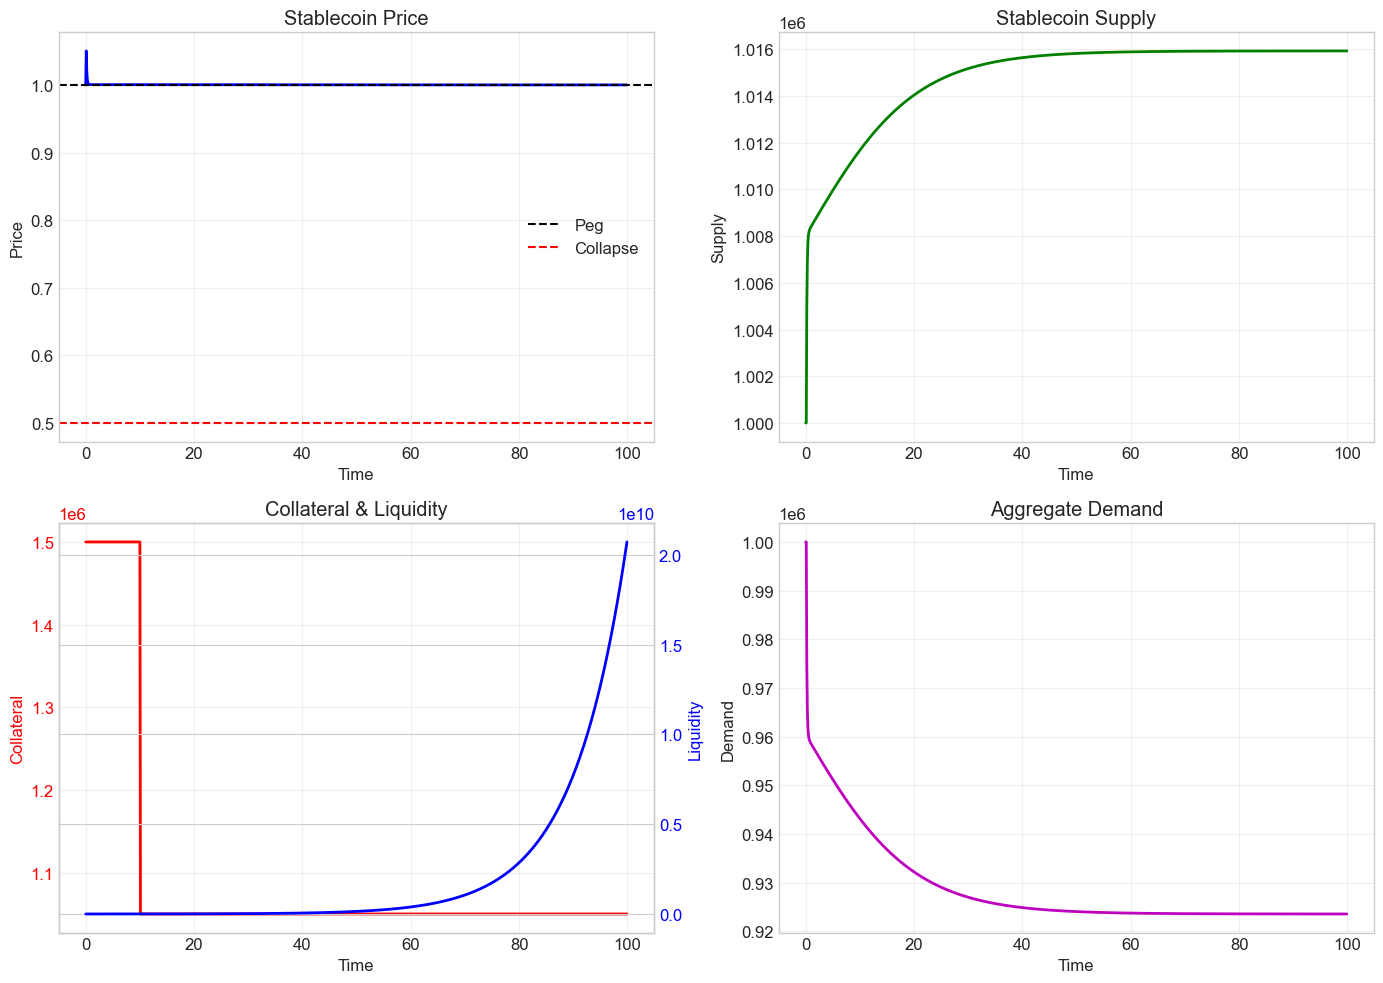

In [14]:
# Plot collateral shock results
plot_results(collateral_results, save_path='../results/plots/collateral_shock_analysis.png')

## 3. Liquidity Crisis Experiment

We simulate a sudden liquidity drain and compare it to the collateral shock.

In [15]:
# Run liquidity crisis experiment
liquidity_results = run_liquidity_crisis_experiment(
    liquidity_shock_magnitude=-0.5,  # 50% liquidity drop
    shock_time=100,
    params=params,
    n_steps=1000
)

print("=" * 50)
print("LIQUIDITY CRISIS EXPERIMENT RESULTS")
print("=" * 50)
print(f"Shock magnitude: -50%")
print(f"Shock time: t=100")
print(f"\nMetrics:")
print(f"  Peg Deviation Integral: {liquidity_results.peg_deviation_integral:.4f}")
print(f"  Time to Collapse: {liquidity_results.time_to_collapse:.2f}")
print(f"  Max Drawdown: {liquidity_results.max_drawdown:.4f}")
print(f"  Recovered: {liquidity_results.recovered}")

LIQUIDITY CRISIS EXPERIMENT RESULTS
Shock magnitude: -50%
Shock time: t=100

Metrics:
  Peg Deviation Integral: 0.0203
  Time to Collapse: inf
  Max Drawdown: 0.0141
  Recovered: True


Plot saved to ../results/plots/liquidity_crisis_analysis.png


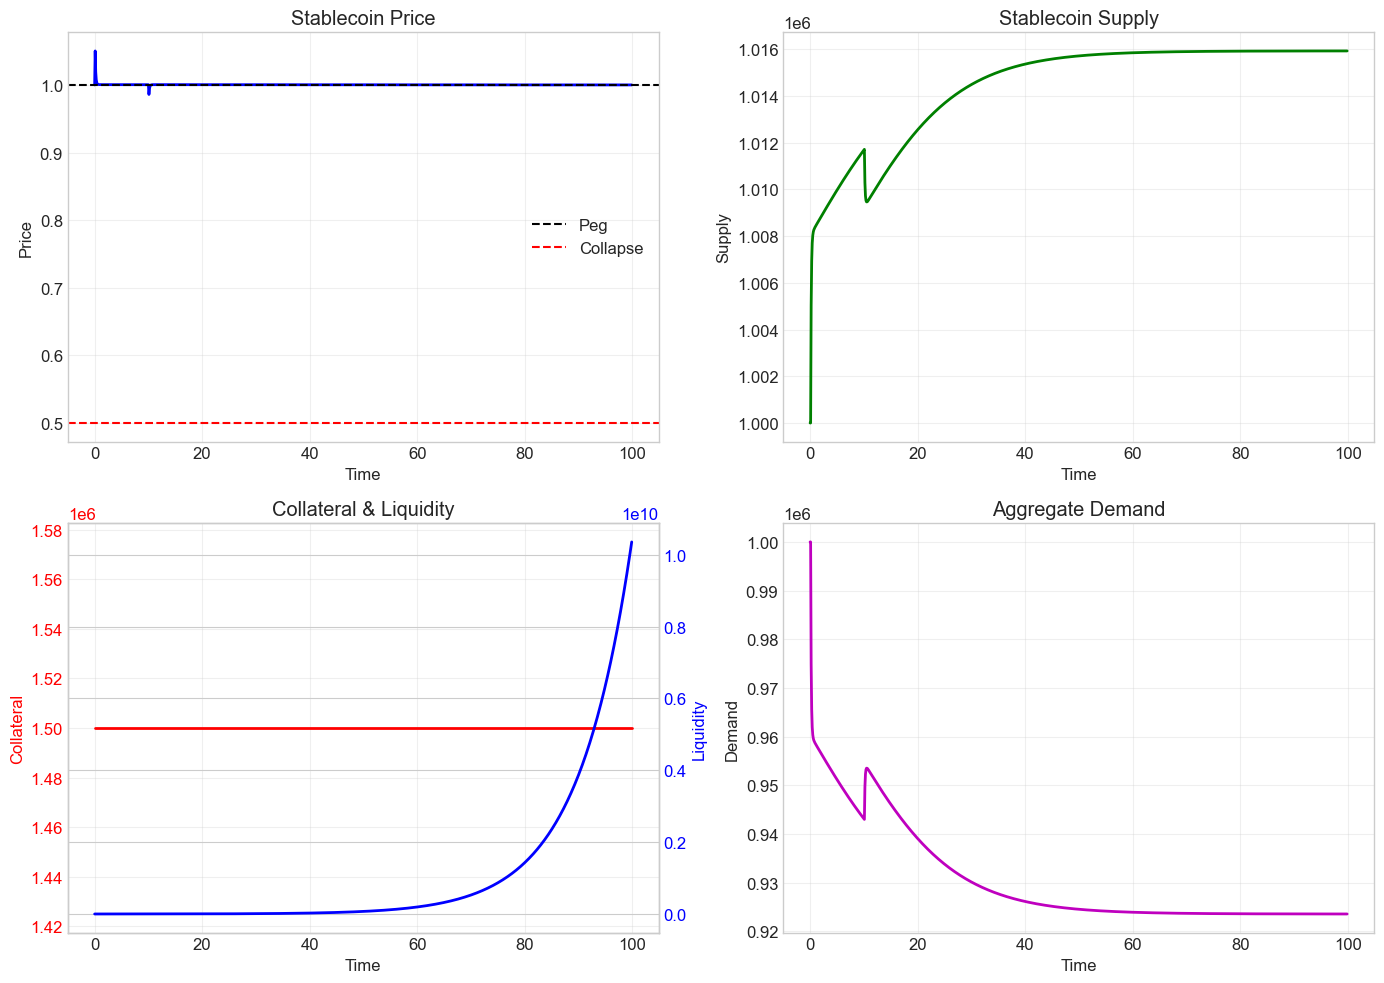

In [16]:
# Plot liquidity crisis results
plot_results(liquidity_results, save_path='../results/plots/liquidity_crisis_analysis.png')

## 4. Comparative Analysis

Compare system behavior under collateral shock vs. liquidity crisis.

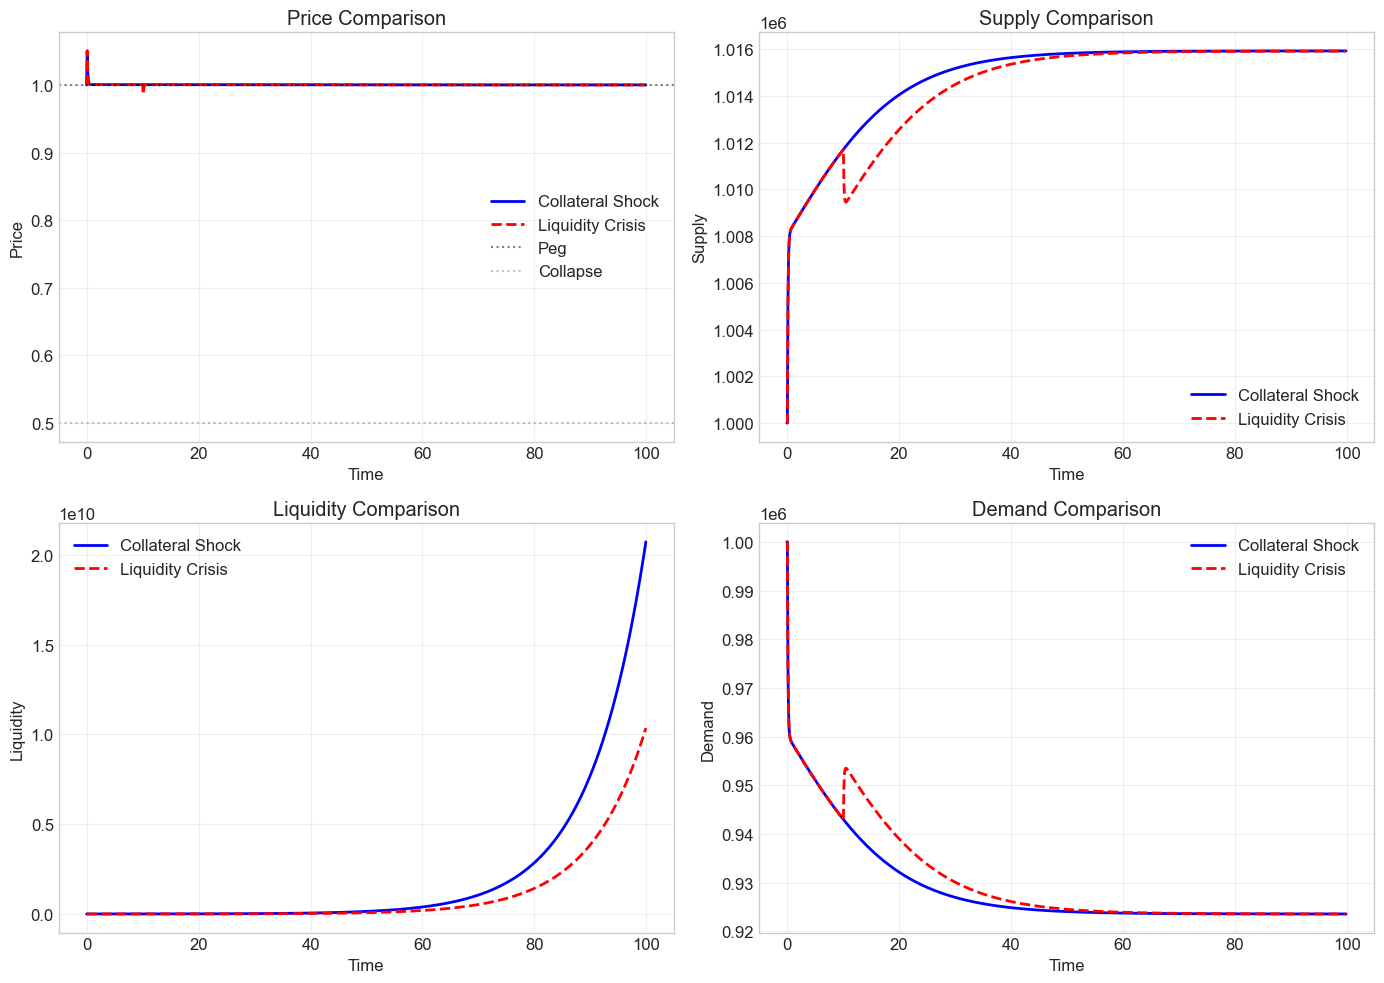

In [17]:
# Compare price trajectories
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price comparison
axes[0, 0].plot(collateral_results.time, collateral_results.price, 'b-', 
                label='Collateral Shock', linewidth=2)
axes[0, 0].plot(liquidity_results.time, liquidity_results.price, 'r--', 
                label='Liquidity Crisis', linewidth=2)
axes[0, 0].axhline(y=1.0, color='k', linestyle=':', alpha=0.5, label='Peg')
axes[0, 0].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5, label='Collapse')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Supply comparison
axes[0, 1].plot(collateral_results.time, collateral_results.supply, 'b-', 
                label='Collateral Shock', linewidth=2)
axes[0, 1].plot(liquidity_results.time, liquidity_results.supply, 'r--', 
                label='Liquidity Crisis', linewidth=2)
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Supply')
axes[0, 1].set_title('Supply Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Liquidity comparison
axes[1, 0].plot(collateral_results.time, collateral_results.liquidity, 'b-', 
                label='Collateral Shock', linewidth=2)
axes[1, 0].plot(liquidity_results.time, liquidity_results.liquidity, 'r--', 
                label='Liquidity Crisis', linewidth=2)
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Liquidity')
axes[1, 0].set_title('Liquidity Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Demand comparison
axes[1, 1].plot(collateral_results.time, collateral_results.demand, 'b-', 
                label='Collateral Shock', linewidth=2)
axes[1, 1].plot(liquidity_results.time, liquidity_results.demand, 'r--', 
                label='Liquidity Crisis', linewidth=2)
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Demand')
axes[1, 1].set_title('Demand Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/comparison_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Shock Magnitude Sensitivity

Analyze how different shock magnitudes affect system stability.

In [18]:
# Test multiple shock magnitudes
shock_magnitudes = [-0.1, -0.2, -0.3, -0.4, -0.5]
results_by_shock = []

for shock in shock_magnitudes:
    result = run_collateral_shock_experiment(
        shock_magnitude=shock,
        shock_time=100,
        params=params,
        n_steps=1000
    )
    results_by_shock.append({
        'shock': shock,
        'peg_deviation': result.peg_deviation_integral,
        'max_drawdown': result.max_drawdown,
        'time_to_collapse': result.time_to_collapse,
        'recovered': result.recovered
    })

# Display results
print("\nSHOCK MAGNITUDE SENSITIVITY ANALYSIS")
print("=" * 70)
print(f"{'Shock':>10} {'Peg Dev':>12} {'Max Drawdown':>14} {'Time to Collapse':>18} {'Recovered':>10}")
print("-" * 70)
for r in results_by_shock:
    ttc = f"{r['time_to_collapse']:.2f}" if r['time_to_collapse'] < np.inf else "inf"
    print(f"{r['shock']:>10.0%} {r['peg_deviation']:>12.4f} {r['max_drawdown']:>14.4f} {ttc:>18} {str(r['recovered']):>10}")


SHOCK MAGNITUDE SENSITIVITY ANALYSIS
     Shock      Peg Dev   Max Drawdown   Time to Collapse  Recovered
----------------------------------------------------------------------
      -10%       0.0158         0.0000                inf       True
      -20%       0.0158         0.0000                inf       True
      -30%       0.0158         0.0000                inf       True
      -40%       0.1314         0.0758                inf       True
      -50%       0.3148         0.1741                inf       True


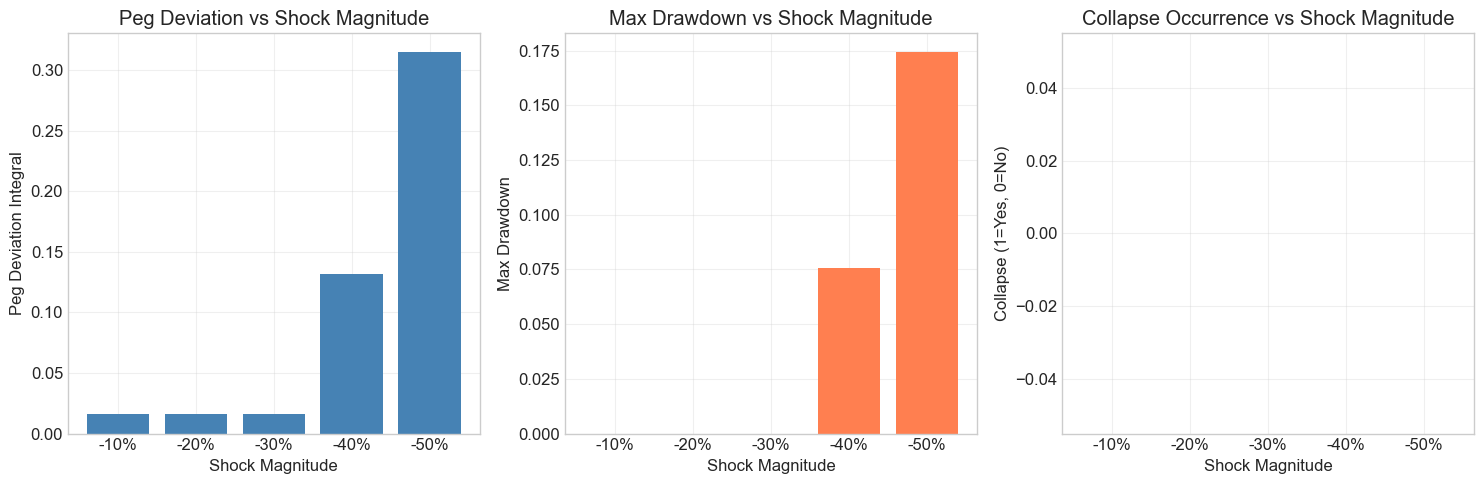

In [19]:
# Plot shock sensitivity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

shocks = [r['shock'] for r in results_by_shock]
peg_devs = [r['peg_deviation'] for r in results_by_shock]
drawdowns = [r['max_drawdown'] for r in results_by_shock]

axes[0].bar(range(len(shocks)), peg_devs, color='steelblue')
axes[0].set_xticks(range(len(shocks)))
axes[0].set_xticklabels([f"{s:.0%}" for s in shocks])
axes[0].set_xlabel('Shock Magnitude')
axes[0].set_ylabel('Peg Deviation Integral')
axes[0].set_title('Peg Deviation vs Shock Magnitude')
axes[0].grid(True, alpha=0.3)

axes[1].bar(range(len(shocks)), drawdowns, color='coral')
axes[1].set_xticks(range(len(shocks)))
axes[1].set_xticklabels([f"{s:.0%}" for s in shocks])
axes[1].set_xlabel('Shock Magnitude')
axes[1].set_ylabel('Max Drawdown')
axes[1].set_title('Max Drawdown vs Shock Magnitude')
axes[1].grid(True, alpha=0.3)

# Collapse rate
collapse_rate = [0 if r['time_to_collapse'] == np.inf else 1 for r in results_by_shock]
axes[2].bar(range(len(shocks)), collapse_rate, color='red', alpha=0.7)
axes[2].set_xticks(range(len(shocks)))
axes[2].set_xticklabels([f"{s:.0%}" for s in shocks])
axes[2].set_xlabel('Shock Magnitude')
axes[2].set_ylabel('Collapse (1=Yes, 0=No)')
axes[2].set_title('Collapse Occurrence vs Shock Magnitude')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/shock_sensitivity.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Summary and Key Findings

### Key Observations

1. **Collateral shocks** affect the backing ratio but the price mechanism can often absorb moderate shocks.

2. **Liquidity crises** directly impact the ability to execute arbitrage, leading to faster feedback loop amplification.

3. **Shock magnitude threshold**: There appears to be a critical threshold beyond which the system cannot recover.

### Metrics Summary

In [20]:
print("\n" + "=" * 60)
print("EXPERIMENT SUMMARY")
print("=" * 60)
print("\nCollateral Shock (-30%):")
print(f"  Peg Deviation Integral: {collateral_results.peg_deviation_integral:.4f}")
print(f"  Max Drawdown: {collateral_results.max_drawdown:.4f}")
print(f"  Time to Collapse: {collateral_results.time_to_collapse}")

print("\nLiquidity Crisis (-50%):")
print(f"  Peg Deviation Integral: {liquidity_results.peg_deviation_integral:.4f}")
print(f"  Max Drawdown: {liquidity_results.max_drawdown:.4f}")
print(f"  Time to Collapse: {liquidity_results.time_to_collapse}")


EXPERIMENT SUMMARY

Collateral Shock (-30%):
  Peg Deviation Integral: 0.0158
  Max Drawdown: 0.0000
  Time to Collapse: inf

Liquidity Crisis (-50%):
  Peg Deviation Integral: 0.0203
  Max Drawdown: 0.0141
  Time to Collapse: inf
